In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data  # Features
y = housing.target  # Target (house prices in $100,000s)

# Create a DataFrame for better understanding
feature_names = housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['Price'] = y

# Display the first few rows
print(df.head())

# Basic statistics
print(df.describe())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression()

In [4]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = model.predict(X_test)

In [7]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

In [8]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.5272474538306172


In [9]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5305677824766758


In [15]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print(score)

0.595770232606166


In [11]:
# Get the intercept (b₀)
print(f"Intercept (b₀): {model.intercept_:.4f}")

# Get the coefficients (b₁, b₂, etc.)
print("\nCoefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Interpret the coefficients
print("\nInterpretation:")
print("For example, if 'MedInc' (median income) increases by 1 unit,")
print(f"house price is predicted to increase by ${model.coef_[0]:.4f} * 100,000 = ${model.coef_[0]*100000:.2f}")

Intercept (b₀): -37.0562

Coefficients:
MedInc: 0.4458
HouseAge: 0.0097
AveRooms: -0.1221
AveBedrms: 0.7786
Population: -0.0000
AveOccup: -0.0034
Latitude: -0.4185
Longitude: -0.4337

Interpretation:
For example, if 'MedInc' (median income) increases by 1 unit,
house price is predicted to increase by $0.4458 * 100,000 = $44582.26


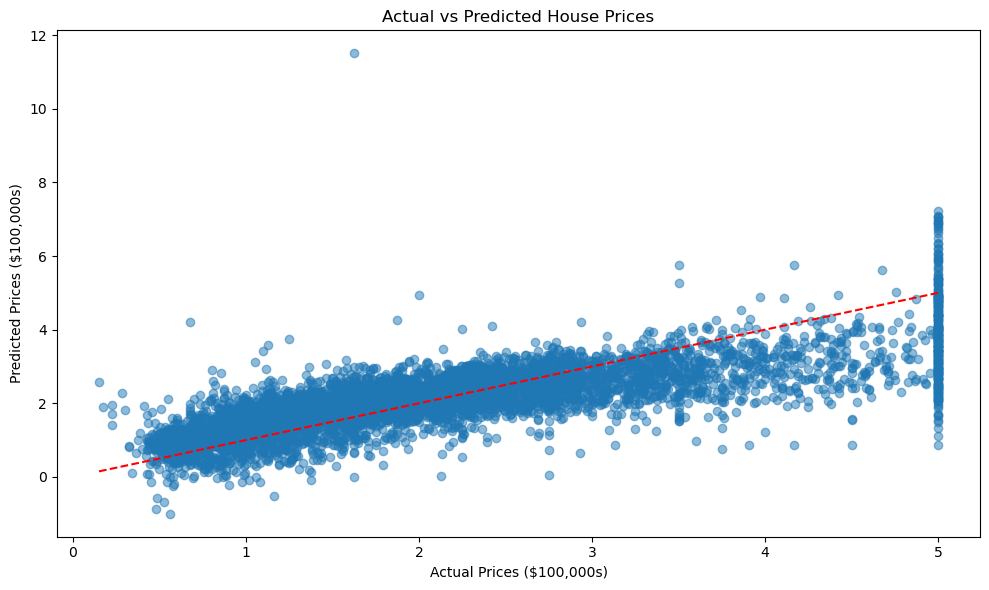

In [12]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices ($100,000s)')
plt.ylabel('Predicted Prices ($100,000s)')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [14]:
# Import additional tools
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a pipeline with scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regression', LinearRegression())
])

# Train the improved model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_improved = pipeline.predict(X_test)

# Evaluate
r2_improved = r2_score(y_test, y_pred_improved)
print(f"Improved R² Score: {r2_improved:.4f}")

Improved R² Score: 0.5958


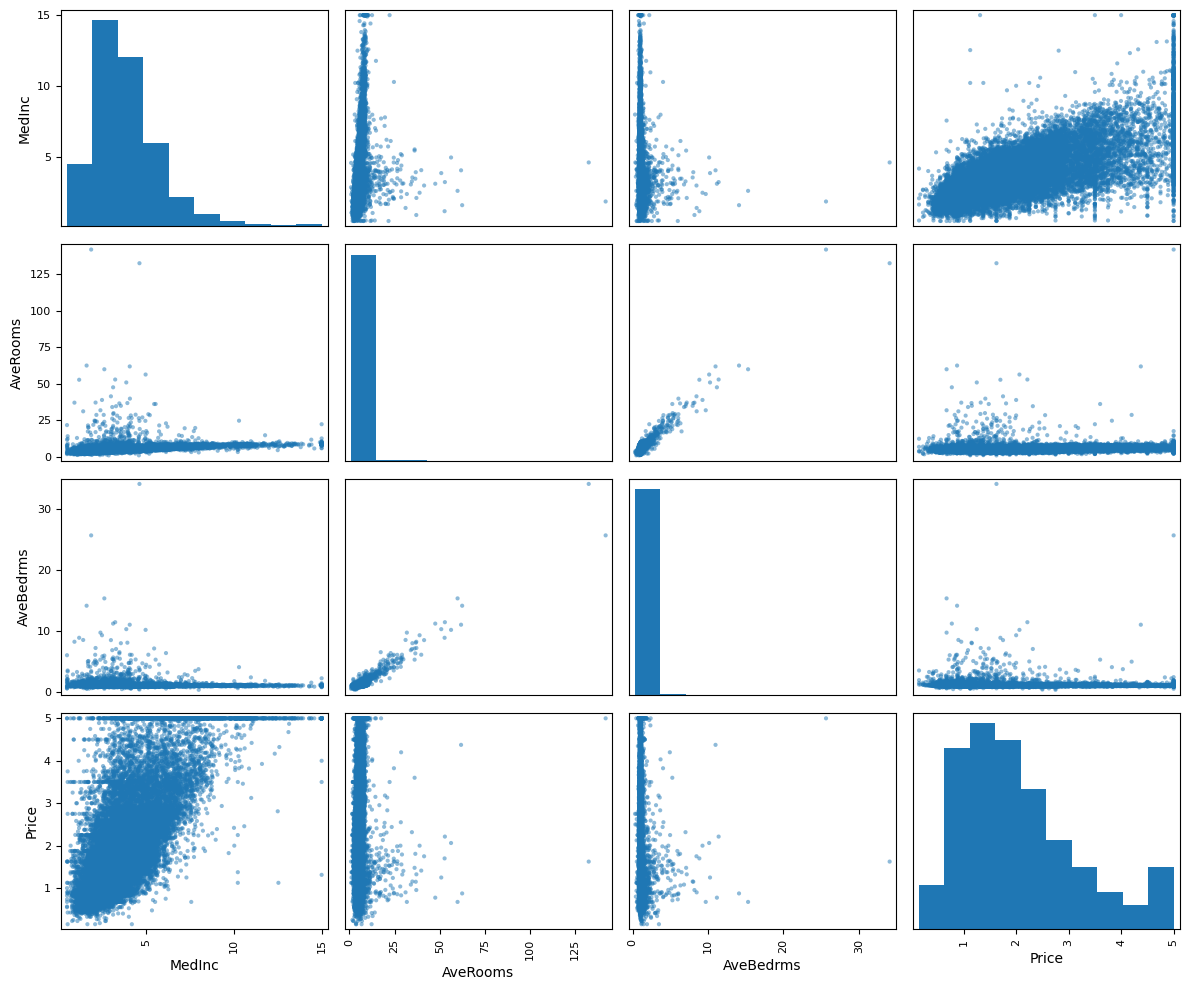

In [16]:
# Create a simple scatter plot matrix to check for linearity
# (For simplicity, we'll just look at a few features)
pd.plotting.scatter_matrix(df[['MedInc', 'AveRooms', 'AveBedrms', 'Price']], 
                          figsize=(12, 10))
plt.tight_layout()
plt.show()
